In [66]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

import hvplot.networkx as hvnx
import holoviews as hv

In [2]:
df = pd.read_csv("AB_NYC_2019.csv")

#df.rename(columns={'neighbourhood_group': 'n_group'}, inplace=True)

# parsing dates and making a year and month col
df['last_review'] = pd.to_datetime(df['last_review'], format="%Y-%m-%d")
df['year'] = df['last_review'].dt.year.astype("Int64")
df['month'] = df['last_review'].dt.month.astype("Int64")
df['day'] = df['last_review'].dt.day.astype("Int64")

df = df.dropna()

df.head(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,year,month,day
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,2018,10,19
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,2019,5,21


In [21]:
df2 = df.query("neighbourhood=='Kensington'")

In [23]:
hosts = list(df2.host_id.unique())

In [55]:
listings = df2.name.to_list()
prices = df2.price.to_list()

In [56]:
len(hosts)

111

In [57]:
len(listings)

140

In [62]:
edges = []

for row in df2.itertuples():
    edges.append((row.host_id, row.name))

In [73]:
G = nx.Graph()
G.add_edges_from(edges)

In [85]:
pos_spring = nx.layout.spring_layout(G, k=3, iterations=100, seed=1)
pos = nx.layout.spring_layout(G)

pos = nx.layout.fruchterman_reingold_layout(G)
pos = nx.layout.random_layout(G)

/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


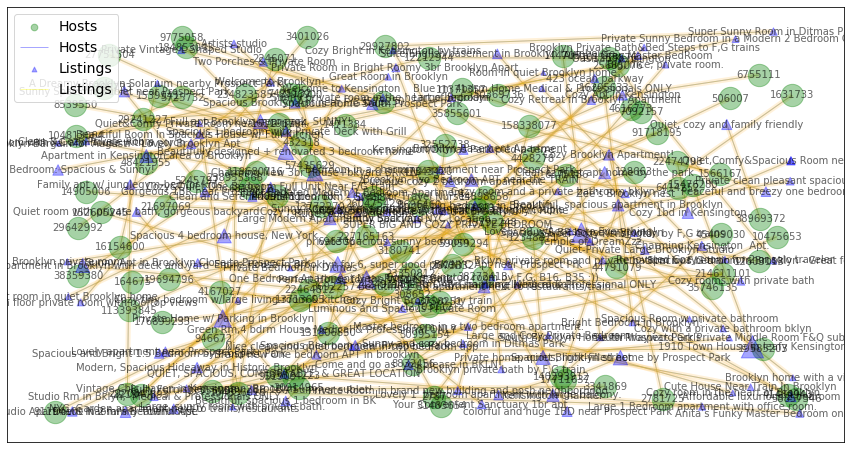

In [86]:
fig, ax = plt.subplots(figsize=(15,8))

# hosts
nx.draw_networkx(G, pos, ax=ax, 
                 font_size=10, nodelist=hosts, label="Hosts",
                 node_size=500, alpha=0.35, edge_color="blue", node_color="green")

# listings
nx.draw_networkx(G, pos, 
                 ax=ax, font_size=10, nodelist=listings, label="Listings",
                 node_shape='^',
                 node_size=prices, alpha=0.35, edge_color="yellow", node_color="blue")

# highlighting egdes by giving them an organge background
nx.draw_networkx_edges(G, pos, alpha=0.15, edge_color='orange', width=5)

ax.legend(fontsize=14, markerscale=0.3, fancybox=True);

# pro hosts

In [127]:
pro_hosts = df.groupby("host_id").count().query("id > 50").index.to_list()

ma = df.host_id.isin(pro_hosts)
print(sum(ma))
df[ma].host_name.nunique(), df[ma].host_id.nunique()

398


(4, 4)

In [126]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,year,month,day
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,2018,10,19
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,2019,5,21
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,2019,7,5
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,2018,11,19
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129,2019,6,22


In [138]:
edges = []
hosts = set()
listings = set()

for row in df[ma].itertuples():
    edges.append((row.host_name, row.name[:10], row.price))
    hosts.add(row.host_name)
    listings.add(row.name[:10])

hosts = list(hosts)
listings = list(listings)

edges[:5]

[('Jeremy & Laura', '5144-Prime', 175),
 ('Jeremy & Laura', '5107-Studi', 140),
 ('Jeremy & Laura', '5146-Doorm', 185),
 ('Jeremy & Laura', '5132- Huge', 168),
 ('Jeremy & Laura', 'Design Lux', 156)]

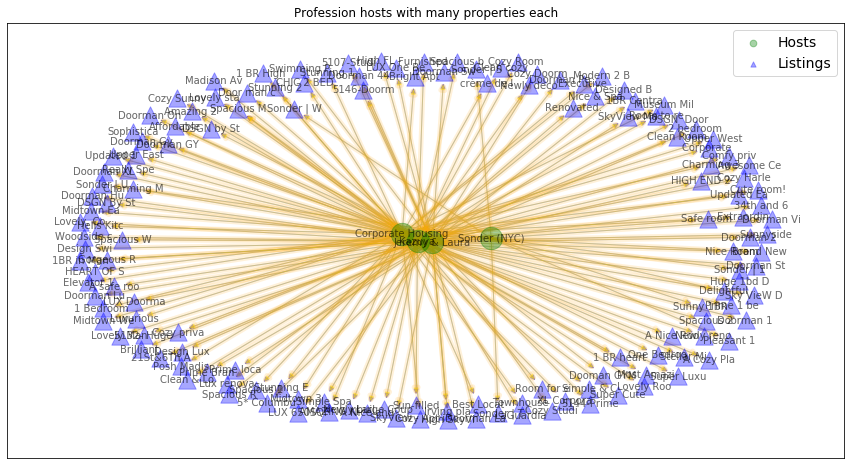

In [141]:
G = nx.DiGraph()
G.add_weighted_edges_from(edges)

pos = nx.layout.fruchterman_reingold_layout(G)
#pos = nx.layout.spectral_layout(G)

fig, ax = plt.subplots(figsize=(15,8))
ax.set_title("Profession hosts with many properties each")


# hosts
nx.draw_networkx(G, pos, ax=ax, 
                 font_size=10, nodelist=hosts, label="Hosts",
                 node_size=500, alpha=0.35, edge_color="blue", node_color="green")

# listings
nx.draw_networkx(G, pos, 
                 ax=ax, font_size=10, nodelist=listings, label="Listings",
                 node_shape='^',
                 alpha=0.35, edge_color="yellow", node_color="blue")

# highlighting egdes by giving them an organge background
nx.draw_networkx_edges(G, pos, alpha=0.15, edge_color='orange', width=5)

ax.legend(fontsize=14, markerscale=0.3, fancybox=True);